# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES data. These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook. You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels. Then construct a frequency table of these values for all people, then for women only and for men only. Then construct these three frequency tables using only people whose age is between 30 and 40.


In [3]:
r = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "NeverMarried",
    6: "Cohabitating",
    77: "Refused",
    99: "Unknown",
}

da["DMDMARTLx"] = da["DMDMARTL"].replace(r)


print("All subjects:")

x = da["DMDMARTLx"].value_counts()

print(x / x.sum())


for ky, db in da.groupby("RIAGENDR"):

    print("\nRIAGENDR=", ky)

    x = db["DMDMARTLx"].value_counts()

    print(x / x.sum())


da3040 = da.query("RIDAGEYR >= 30 & RIDAGEYR <= 40")

for ky, db in da3040.groupby("RIAGENDR"):

    print("\nRIAGENDR=", ky, " 30 <= RIDAGEYR <= 40")

    x = db["DMDMARTLx"].value_counts()

    print(x / x.sum())

All subjects:
DMDMARTLx
Married         0.507855
NeverMarried    0.183412
Divorced        0.105773
Cohabitating    0.096273
Widowed         0.072342
Separated       0.033979
Refused         0.000365
Name: count, dtype: float64

RIAGENDR= 1
DMDMARTLx
Married         0.562881
NeverMarried    0.184451
Cohabitating    0.100991
Divorced        0.087271
Widowed         0.038110
Separated       0.025915
Refused         0.000381
Name: count, dtype: float64

RIAGENDR= 2
DMDMARTLx
Married         0.457193
NeverMarried    0.182456
Divorced        0.122807
Widowed         0.103860
Cohabitating    0.091930
Separated       0.041404
Refused         0.000351
Name: count, dtype: float64

RIAGENDR= 1  30 <= RIDAGEYR <= 40
DMDMARTLx
Married         0.556680
NeverMarried    0.204453
Cohabitating    0.157895
Divorced        0.048583
Separated       0.024291
Widowed         0.006073
Refused         0.002024
Name: count, dtype: float64

RIAGENDR= 2  30 <= RIDAGEYR <= 40
DMDMARTLx
Married         0.535714
Nev

**Q1a.** Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.


**Q1b.** Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.


**Q1c.** Repeat part b for the men.


## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. Within each age band, present the distribution in terms of proportions that must sum to 1.


In [4]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()
labels_marriage = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "NeverMarried",
    6: "Cohabiting",
    77: "Refused",
    99: "Unknown",
}
df_mod["DMDMARTLx"] = df_mod["DMDMARTL"].replace(labels_marriage)
df_mod = df_mod[["RIAGENDR", "RIDAGEYR", "DMDMARTLx"]]
df_mod["agegroup"] = pd.cut(
    df_mod["RIDAGEYR"], [18, 20, 30, 40, 50, 60, 70, 80], include_lowest=True
)
df_mod.head()
dx = df_mod.loc[~df_mod.DMDMARTLx.isin(["Refused", np.nan]), :]
dx = dx.groupby(["agegroup"])["DMDMARTLx"]
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x / x.sum(), axis=1)
print("Females")
print(dx.to_string(float_format="%.3f"))

Females
DMDMARTLx       Cohabiting  Divorced  Married  NeverMarried  Separated  Widowed
agegroup                                                                       
(17.999, 20.0]       0.139     0.000    0.025         0.835      0.000    0.000
(20.0, 30.0]         0.209     0.014    0.275         0.481      0.019    0.002
(30.0, 40.0]         0.139     0.072    0.554         0.200      0.031    0.004
(40.0, 50.0]         0.078     0.114    0.631         0.113      0.049    0.016
(50.0, 60.0]         0.072     0.152    0.599         0.096      0.040    0.041
(60.0, 70.0]         0.047     0.159    0.573         0.087      0.041    0.093
(70.0, 80.0]         0.015     0.143    0.463         0.037      0.027    0.315


C:\Users\dongh\AppData\Local\Temp\ipykernel_25496\1115692.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx = dx.groupby(["agegroup"])["DMDMARTLx"]


**Q2a.** Comment on the trends that you see in this series of marginal distributions.


**Q2b.** Repeat the analysis for males.


In [5]:
# insert your code here

**Q2c.** Comment on any notable differences that you see when comparing these results between females and for males.


## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.


c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMXHT', ylabel='Count'>

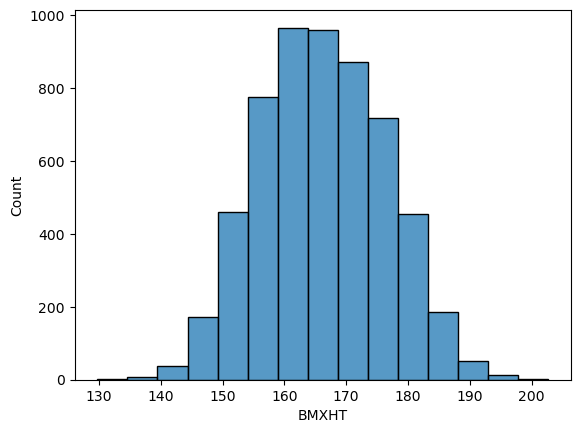

In [6]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()

sns.histplot(df_mod["BMXHT"], bins=15)

**Q3a.** Use the `bins` argument to [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) to produce histograms with different numbers of bins. Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small.


**Q3b.** Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.


c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Female


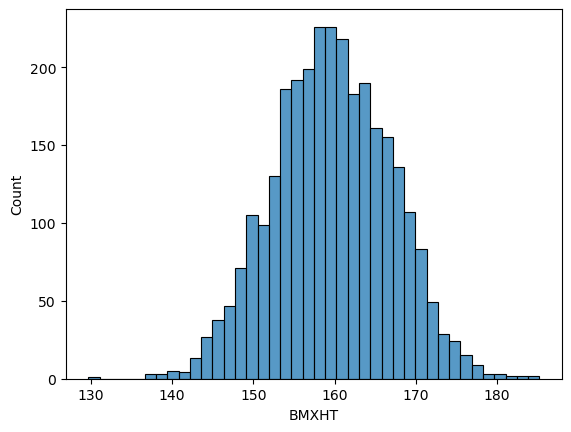

Male


c:\Users\dongh\anaconda3\envs\py3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


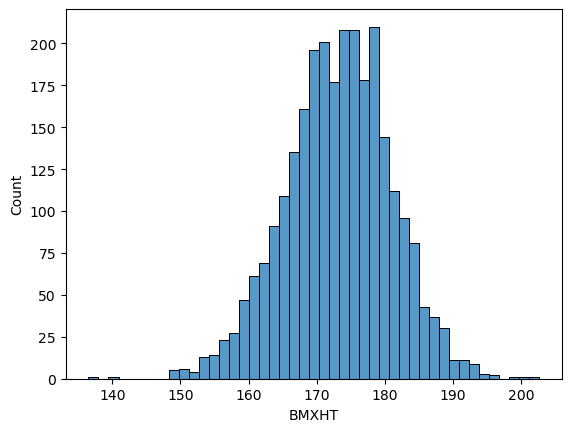

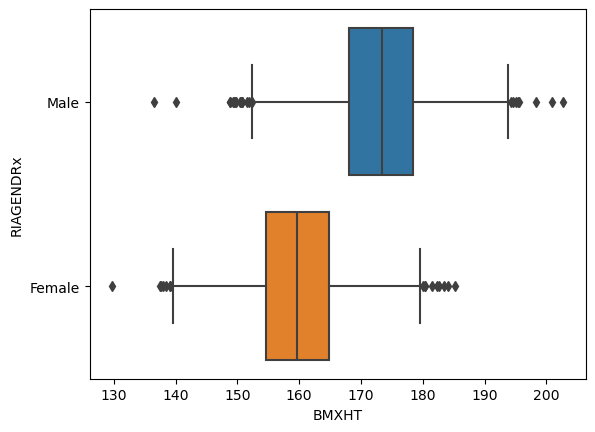

In [7]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()
label_gender = {1: "Male", 2: "Female"}
df_mod["RIAGENDRx"] = df_mod.RIAGENDR.replace(label_gender)
df_fem = df_mod.query("RIAGENDRx =='Female'")
df_male = df_mod.query("RIAGENDRx =='Male'")

print("Female")
sns.histplot(df_fem["BMXHT"])
plt.show()
print("Male")
sns.histplot(df_male["BMXHT"])
plt.show()

sns.boxplot(df_mod, x="BMXHT", y="RIAGENDRx")
plt.show()

**Q3c.** Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.


## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).


<Axes: >

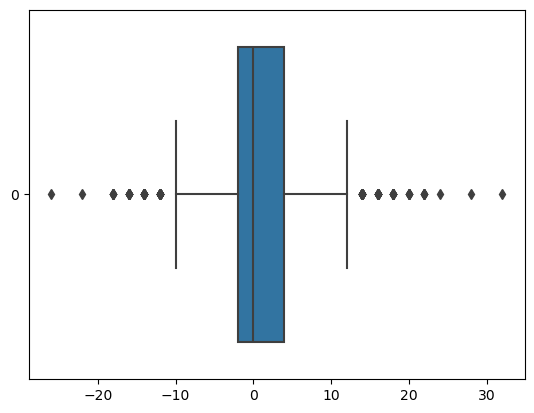

In [8]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()
df_mod["BPXSY Diff"] = df_mod["BPXSY1"] - df_mod["BPXSY2"]
sns.boxplot(df_mod["BPXSY Diff"], orient="h")

**Q4a.** What proportion of the subjects have a lower SBP on the second reading compared to the first?


In [9]:
# lower_second = df_mod["BPXSY1"].dropna() > df_mod["BPXSY2"].dropna()
lower_second = df_mod["BPXSY Diff"].dropna() > 0
print(np.mean(lower_second))

0.45874464518532315


**Q4b.** Make side-by-side boxplots of the two systolic blood pressure variables.


<Axes: >

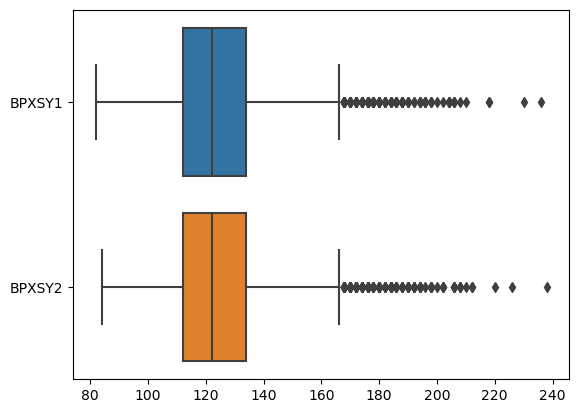

In [10]:
sns.boxplot(df_mod.loc[:, ["BPXSY1", "BPXSY2"]], orient="h")

**Q4c.** Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.


## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)). Convert the frequencies to proportions.


In [11]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()
pd.crosstab(df_mod.DMDEDUC2, df_mod.DMDHHSIZ, margins=True, normalize="index")

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
2.0,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
3.0,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
4.0,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
5.0,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
9.0,0.000000,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000
All,0.140300,0.278407,0.179393,0.160212,0.118743,0.062843,0.060102


**Q5a.** Comment on any major differences among the distributions.


**Q5b.** Restrict the sample to people between 30 and 40 years of age. Then calculate the median household size for women and men within each level of educational attainment.


In [12]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()
label_gender = {1: "Male", 2: "Female"}
label_education = {
    1: "1) LT 9",
    2: "2) 9 to 11",
    3: "3) HS or GED",
    4: "4) Some college or AA",
    5: "5) College",
    7: "7) Refused",
    9: "9) Don't know",
}
df_mod["RIAGENDRx"] = df_mod["RIAGENDR"].replace(label_gender)
df_mod["DMDEDUC2x"] = df_mod["DMDEDUC2"].replace(label_education)
df_mod = df_mod[["RIAGENDRx", "RIDAGEYR", "DMDEDUC2x", "DMDHHSIZ"]]

binrange = pd.interval_range(start=30, end=40, periods=1, closed="both")

df_mod["agegroup"] = pd.cut(df_mod.RIDAGEYR, binrange)
# print(df_mod.DMDEDUC2x.value_counts())
df_mod = df_mod.loc[~df_mod.DMDEDUC2x.isin(["7) Refused", "9) Don't know"]), :]

dx = df_mod.groupby(["agegroup", "RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].median()
print(dx)

df_mod.head(20)

agegroup  RIAGENDRx  DMDEDUC2x            
[30, 40]  Female     1) LT 9                  5.0
                     2) 9 to 11               5.0
                     3) HS or GED             5.0
                     4) Some college or AA    4.0
                     5) College               3.0
          Male       1) LT 9                  5.0
                     2) 9 to 11               4.5
                     3) HS or GED             4.0
                     4) Some college or AA    4.0
                     5) College               3.0
Name: DMDHHSIZ, dtype: float64


C:\Users\dongh\AppData\Local\Temp\ipykernel_25496\3821503889.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dx = df_mod.groupby(["agegroup", "RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].median()


,RIAGENDRx,RIDAGEYR,DMDEDUC2x,DMDHHSIZ,agegroup
0,Male,62,5) College,2,NaN
1,Male,53,3) HS or GED,1,NaN
2,Male,78,3) HS or GED,2,NaN
3,Female,56,5) College,1,NaN
4,Female,42,4) Some college or AA,5,NaN
5,Female,72,2) 9 to 11,5,NaN
6,Male,22,4) Some college or AA,3,NaN
7,Female,32,4) Some college or AA,4,"[30.0, 40.0]"
8,Male,18,NaN,3,NaN
9,Male,56,3) HS or GED,1,NaN


## Question 6

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU). Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.


In [15]:
df = pd.read_csv("nhanes_2015_2016.csv")
df_mod = df.copy()

df_male = df_mod.where(df_mod.RIAGENDR == 1)
df_female = df_mod.where(df_mod.RIAGENDR == 2)

df_male = df_male[["SDMVSTRA", "SDMVPSU", "RIDAGEYR", "BMXHT", "BMXBMI"]]
df_female = df_female[["SDMVSTRA", "SDMVPSU", "RIDAGEYR", "BMXHT", "BMXBMI"]]

In [16]:
### Males ###
df_mean = df_male.groupby(["SDMVPSU", "SDMVSTRA"]).mean()

ratio_height_mean = df_mean["BMXHT"].max() / df_mean["BMXHT"].min()
print("Males")
print(round(ratio_height_mean, 3), " (Height)")

ratio_age_mean = df_mean["RIDAGEYR"].max() / df_mean["RIDAGEYR"].min()
print(round(ratio_age_mean, 3), " (Age)")

ratio_bmi_mean = df_mean["BMXBMI"].max() / df_mean["BMXBMI"].min()
print(round(ratio_bmi_mean, 3), " (BMI)")

### Females ###
df_mean = df_female.groupby(["SDMVPSU", "SDMVSTRA"]).mean()

ratio_height_mean = df_mean["BMXHT"].max() / df_mean["BMXHT"].min()
print("Females")
print(round(ratio_height_mean, 3), " (Height)")

ratio_age_mean = df_mean["RIDAGEYR"].max() / df_mean["RIDAGEYR"].min()
print(round(ratio_age_mean, 3), " (Age)")

ratio_bmi_mean = df_mean["BMXBMI"].max() / df_mean["BMXBMI"].min()
print(round(ratio_bmi_mean, 3), " (BMI)")

Males
1.045  (Height)
1.311  (Age)
1.233  (BMI)
Females
1.048  (Height)
1.308  (Age)
1.246  (BMI)


**Q6a.** Comment on the extent to which mean age, height, and BMI vary among the MVUs.


**Q6b.** Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU. Report the ratio between the largest and smalles IQR across the MVUs.


In [17]:
### Males ###

df_q3 = df_male.groupby(["SDMVPSU", "SDMVSTRA"]).quantile(0.75, numeric_only=True)
df_q1 = df_male.groupby(["SDMVPSU", "SDMVSTRA"]).quantile(0.25, numeric_only=True)

df_iqr = df_q3 - df_q1

ratio_height_iqr = df_iqr["BMXHT"].max() / df_iqr["BMXHT"].min()
print("Males")
print(round(ratio_height_iqr, 3), " (Height)")

ratio_age_iqr = df_iqr["RIDAGEYR"].max() / df_iqr["RIDAGEYR"].min()
print(round(ratio_age_iqr, 3), " (Age)")

ratio_bmi_iqr = df_iqr["BMXBMI"].max() / df_iqr["BMXBMI"].min()
print(round(ratio_bmi_iqr, 3), " (BMI)")

### Females ###

df_q3 = df_female.groupby(["SDMVPSU", "SDMVSTRA"]).quantile(0.75, numeric_only=True)
df_q1 = df_female.groupby(["SDMVPSU", "SDMVSTRA"]).quantile(0.25, numeric_only=True)

df_iqr = df_q3 - df_q1

ratio_height_iqr = df_iqr["BMXHT"].max() / df_iqr["BMXHT"].min()
print("Females")
print(round(ratio_height_iqr, 3), " (Height)")

ratio_age_iqr = df_iqr["RIDAGEYR"].max() / df_iqr["RIDAGEYR"].min()
print(round(ratio_age_iqr, 3), " (Age)")

ratio_bmi_iqr = df_iqr["BMXBMI"].max() / df_iqr["BMXBMI"].min()
print(round(ratio_bmi_iqr, 3), " (BMI)")

Males
1.587  (Height)
1.831  (Age)
2.341  (BMI)
Females
1.587  (Height)
1.625  (Age)
1.516  (BMI)


**Q6c.** Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.
